In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/linuxbrew/.linuxbrew/opt/python@3.12/lib/python3.12/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [12]:
im = plt.imread(r'../../Downloads/red_new.jpg')
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
smoothingMask = np.ones((15,15))/225

In [13]:
smoothingMask

array([[0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 

In [14]:
imBlurred = signal.convolve2d(imGray, smoothingMask, boundary='symm', mode='same')

In [15]:
imBlurred

array([[187.05777778, 186.60888889, 186.10222222, ..., 158.94222222,
        163.51555556, 165.86666667],
       [186.97777778, 186.60444444, 186.27111111, ..., 158.93777778,
        163.50666667, 165.86666667],
       [187.10222222, 186.72888889, 186.52888889, ..., 159.01777778,
        163.57333333, 165.92888889],
       ...,
       [112.58666667, 112.66666667, 112.76444444, ..., 191.66222222,
        191.83555556, 192.15555556],
       [112.54222222, 112.52888889, 112.50666667, ..., 191.89777778,
        191.96444444, 192.24      ],
       [112.75111111, 112.62222222, 112.51555556, ..., 192.06666667,
        192.04      , 192.26222222]])

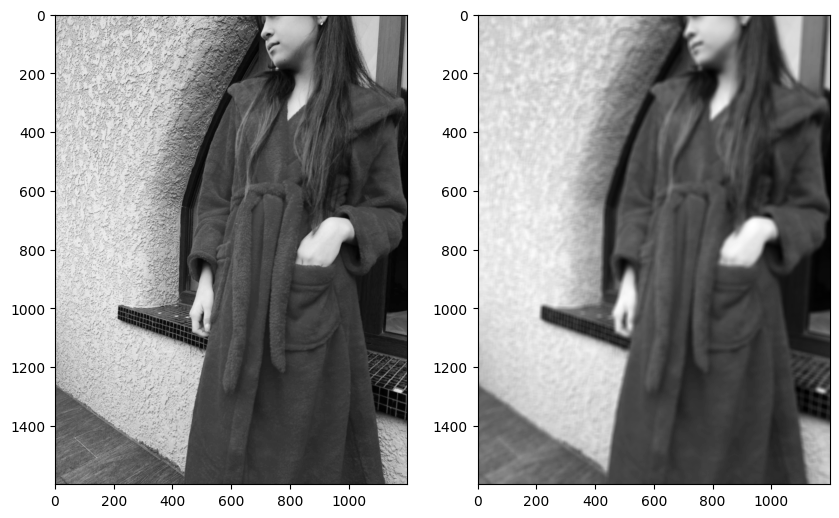

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray, cmap='gray')
ax2.imshow(imBlurred, cmap='gray')

# FIRST IMAGE MORE SHARP

In [19]:
xMask = np.array([[-1,0,1], [-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [22]:
fx = signal.convolve2d(imGray, xMask, boundary='symm', mode='same')
fy = signal.convolve2d(imGray, yMask, boundary='symm', mode='same')

In [23]:
fx.shape

(1600, 1200)

In [24]:
fy.shape

(1600, 1200)

In [26]:
Gm = (fx**2 + fy**2)**0.5

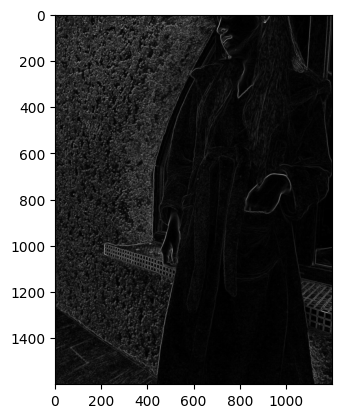

In [27]:
plt.imshow(Gm, cmap='gray')

In [30]:
th = Gm.max()-4*Gm.std()

In [31]:
th

325.5693353507729

In [34]:
E = Gm>th/18

In [35]:
E

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False]])

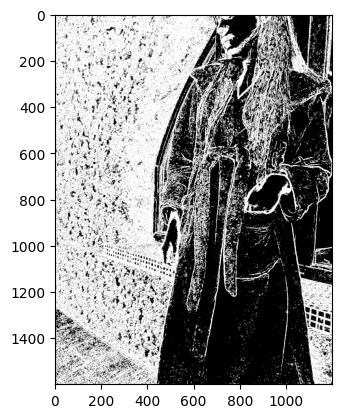

In [36]:
plt.imshow(E, cmap='gray')

In [41]:
imSharped = imBlurred + Gm * 0.5

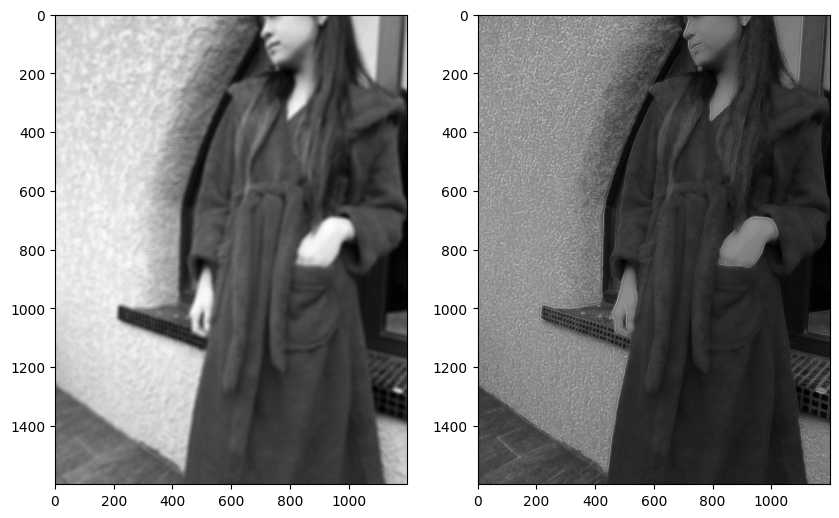

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imBlurred, cmap='gray')
ax2.imshow(imSharped, cmap='gray')